In [685]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
import catboost as cb
from sklearn import svm
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
pd.set_option('display.max_columns', None)
path="telecom_churn_moredata.csv"

In [686]:
df=pd.read_csv(path, index_col=0)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
3733-LSYCE,Female,0,Yes,No,15,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.35,1114.55,No
5313-FPXWG,Male,0,No,No,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.60,1266.4,No
5995-WWKKG,Female,0,No,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.80,695.05,No
7048-GXDAY,Male,0,No,No,39,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,4040.65,No
9074-KGVOX,Male,0,Yes,Yes,50,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),39.45,2021.35,No


In [687]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [688]:
df.shape

(7043, 20)

In [689]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [691]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')

In [692]:
df.TotalCharges.isnull().sum()

11

In [693]:
df[df.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


We see tenure is 0.Let's see how many customers have just started availing this service 

In [694]:
df[df.tenure == 0].gender.count()

11

In [695]:
df[df.tenure == 1].sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
2202-CUYXZ,Male,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,84.85,Yes
2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
7932-WPTDS,Female,1,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes


For tenure of 1 month, total charges is same as monthly charges

So, for tenure 0 (customers that are just starting), we will update total charges as 0

In [696]:
df.TotalCharges.fillna(0, inplace=True)

In [697]:
ct1=pd.crosstab(df.gender, df.Churn)
colsum=ct1.sum()
colpct=ct1/colsum
colpct

Churn,No,Yes
gender,,
Female,0.492656,0.502408
Male,0.507344,0.497592


The hypothesis being tested for chi-square is

Null: Variable A and Variable B are independent.
Alternate: Variable A and Variable B are not independent.

In [698]:
from scipy.stats import chi2_contingency
chi2_contingency(ct1)

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067,  925.61010933],
        [2611.61010933,  943.38989067]]))

If the p-value(0.47) is greater than the assumed significance value (0.05), then we accept H0 and conclude that gender and churn are independent of each other

<AxesSubplot:xlabel='gender', ylabel='Churn'>

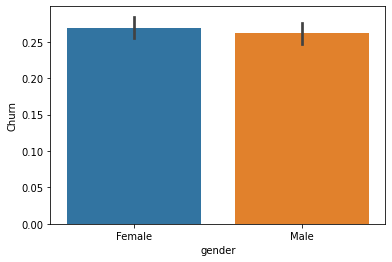

In [699]:
#Response variable - numeric
#Independent variable - categorical 
df.Churn.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df.gender=df.gender.astype('category')
df.Churn=pd.to_numeric(df.Churn)
sns.barplot(df.gender, df.Churn)

<AxesSubplot:>

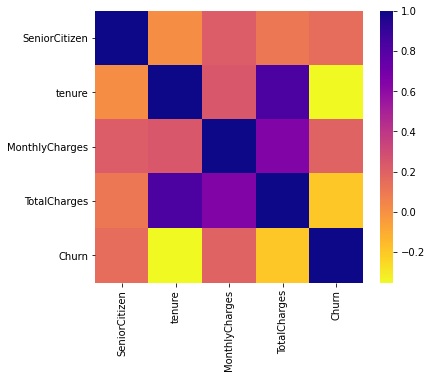

In [700]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), cmap="plasma_r")

In [701]:
df.gender.replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)
df.Partner.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df.Dependents.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df.PhoneService.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df.MultipleLines.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)

In [702]:
df.replace(to_replace=['No internet service'], value=[0], inplace=True)
df.InternetService.replace(to_replace=['No', 'DSL', 'Fiber optic'], value=[0,1,2], inplace=True)
df.OnlineSecurity.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)
df.OnlineBackup.replace(to_replace=['No','Yes'], value=[0,1], inplace=True)
df.DeviceProtection.replace(to_replace=['No','Yes'], value=[0,1], inplace=True)
df.TechSupport.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)
df.StreamingMovies.replace(to_replace=[ 'No', 'Yes'], value=[0,1], inplace=True)
df.StreamingTV.replace(to_replace=['No', 'Yes'], value=[0,1], inplace=True)

df.InternetService.replace(to_replace=['No', 'DSL', 'Fiber optic'], value=[0,1,2], inplace=True)
df.OnlineSecurity.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)
df.OnlineBackup.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)
df.DeviceProtection.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)
df.TechSupport.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)
df.StreamingMovies.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)
df.StreamingTV.replace(to_replace=['No internet service', 'No', 'Yes'], value=[0,1,2], inplace=True)

In [703]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [704]:
df.Contract.replace(to_replace=[ 'One year', 'Two year', 'Month-to-month'], value=[1,2,3], inplace=True)

In [705]:
df.PaperlessBilling.replace(to_replace=['Yes', 'No'], value=[1,0], inplace=True)
df.PaymentMethod.replace(to_replace=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], value=[1,2, 3, 4], inplace=True)

In [706]:
df.MultipleLines.replace(to_replace=['No phone service'], value=[0], inplace=True)

In [707]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
8048-DSDFQ,1,0,0,0,1,1,0,0,0,0,0,0,0,0,3,0,2,20.2,20.20,0
0306-JAELE,1,0,0,0,5,1,0,2,0,0,0,1,1,1,3,1,1,96.1,453.40,1
4104-PVRPS,1,0,1,0,24,1,0,1,1,0,0,1,0,0,3,0,2,53.6,1315.35,0


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

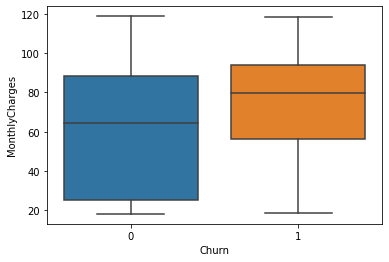

In [708]:
sns.boxplot(df.Churn, df.MonthlyCharges)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

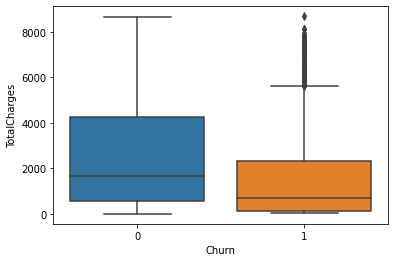

In [709]:
sns.boxplot(df.Churn, df.TotalCharges)

In [710]:
#identify co-relation b/w tenure, monthly and total charges
df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651174,0.826178
MonthlyCharges,0.651174,1.000000,0.247900
tenure,0.826178,0.247900,1.000000


These 3 are positively co-related and hence we should eliminate TotalCharge as feature(redundant)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

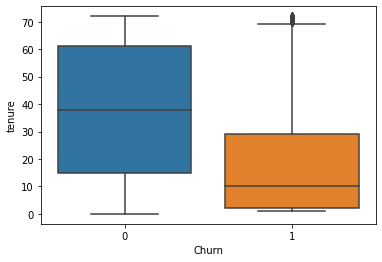

In [711]:
sns.boxplot(df.Churn, df.tenure)

Customers who have churned have a median tenure of less than a year

<AxesSubplot:xlabel='SeniorCitizen'>

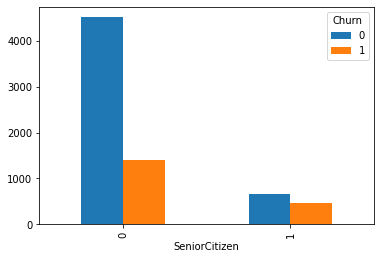

In [712]:
pd.crosstab(df.SeniorCitizen, df.Churn).plot(kind="bar")

% of churning in senior citizens is more

<AxesSubplot:xlabel='InternetService'>

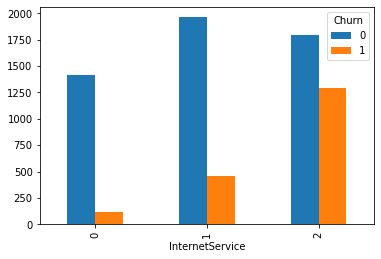

In [713]:
pd.crosstab(df.InternetService, df.Churn).plot(kind="bar")

Many fiber optic customers have churned

<AxesSubplot:xlabel='Partner'>

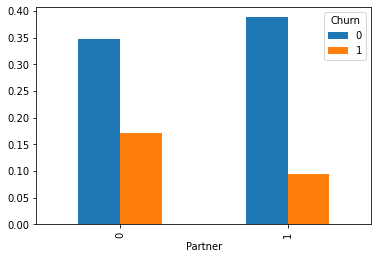

In [714]:
pd.crosstab(df.Partner, df.Churn, normalize=True).plot(kind="bar")

Churning is lower in customers who have got married

<AxesSubplot:xlabel='Contract'>

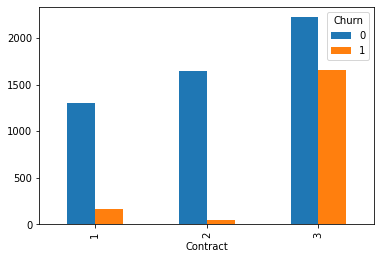

In [715]:
pd.crosstab(df.Contract, df.Churn).plot(kind="bar")

Customers with month-wise contract tend to churn more

In [716]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

H0=Churn and PaperlessBilling are independent<br>
H1=Churn and PaperlessBilling are dependent

In [717]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.Churn, df.PaperlessBilling))

(258.27764906707307,
 4.073354668665985e-58,
 1,
 array([[2109.85773108, 3064.14226892],
        [ 762.14226892, 1106.85773108]]))

p is less than 0.05 , so we reject H0 and conclude Churn and Billing are co-related

In [718]:
chi2_contingency(pd.crosstab(df.Churn, df.PhoneService))

(0.9150329892546948,
 0.3387825358066928,
 1,
 array([[ 501.01774812, 4672.98225188],
        [ 180.98225188, 1688.01774812]]))

<AxesSubplot:xlabel='PhoneService'>

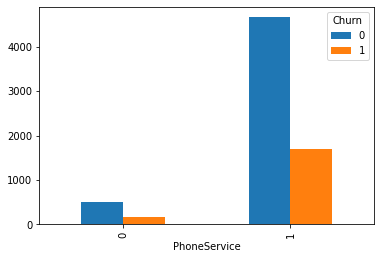

In [719]:
pd.crosstab(df.PhoneService, df.Churn).plot(kind="bar")

p is greater than 0.05 , so we accept H0 and conclude Churn and PhoneService are not related

In [720]:
df.groupby('InternetService').Churn.sum()

InternetService
0     113
1     459
2    1297
Name: Churn, dtype: int64

In [721]:
df.groupby('StreamingMovies').Churn.sum()

StreamingMovies
0    1051
1     818
Name: Churn, dtype: int64

In [722]:
y=df.Churn.values
#X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X=df[['InternetService', 'Contract','SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [723]:
#Numeric attributes
#scalar_att=['MonthlyCharges', 'TotalCharges', 'tenure']
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)
#X_train[scalar_att][0:5]

In [724]:
sc=StandardScaler()
#X_train[scalar_att]=sc.fit_transform(X_train[scalar_att])
#X_test[scalar_att]=sc.transform(X_test[scalar_att])

Classification 

0.7751277683134583
0.7855731464765812


<AxesSubplot:>

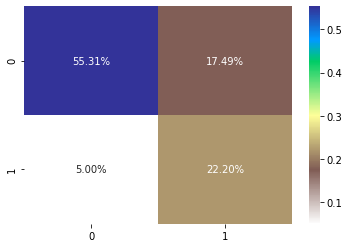

In [725]:
lr=LogisticRegression(solver='newton-cg', class_weight="balanced")
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

In [726]:
dt=DecisionTreeClassifier(criterion="gini", max_depth=4,  class_weight="balanced")
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(accuracy_score(y_test, ypred))
print(recall_score(y_test, ypred))
f1_score(y_test, ypred, average="weighted")

0.7461669505962522
0.7954070981210856


0.7587434285181743

0.3781942078364566
0.9478079331941545
0.3265112100223684


<AxesSubplot:>

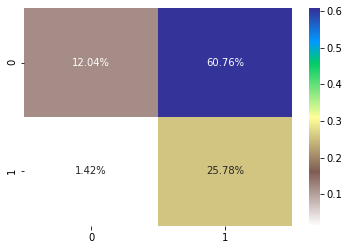

In [727]:
from sklearn import svm
svm_model=svm.SVC(kernel="poly", class_weight="balanced", degree=6)
svm_model.fit(X_train,y_train)
ypred=svm_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

0.7512776831345827
0.7642553681971955
0.8413361169102297


<AxesSubplot:>

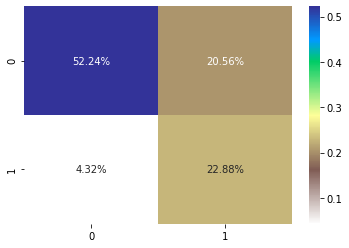

In [728]:
rt=RandomForestClassifier(max_depth=4, n_estimators=1900, class_weight="balanced")
rt.fit(X_train,y_train)
ypred=rt.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
print(recall_score(y_test, ypred))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

0.7597955706984668
0.771975470980583
0.8350730688935282


<AxesSubplot:>

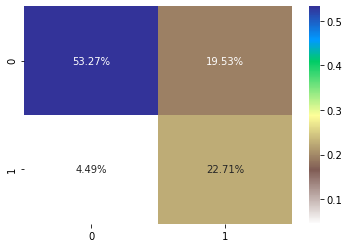

In [729]:
cat_model=cb.CatBoostClassifier(max_depth=4, n_estimators=2500, scale_pos_weight=2.9, cat_features=['InternetService', 'Contract','SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod'])
cat_model.fit(X_train,y_train, verbose=False)
ypred=cat_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
print(recall_score(y_test, ypred))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

Feature Engineering

Binning 'tenure' into baskets

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

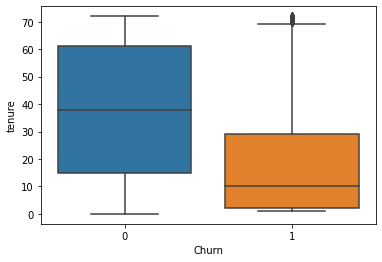

In [730]:
sns.boxplot(df.Churn, df.tenure)

In [731]:
df[df.tenure >30 ].Churn.sum()/df[df.tenure >30].Churn.count()

0.13051146384479717

More than 30 mths and around 13% of them churn.

In [732]:
df[df.tenure < 12].Churn.sum()/df[df.tenure < 12].Churn.count()

0.4828419526341228

Less than a yr,  % of churn around 50%

In [733]:
df[(df.tenure >=12) & (df.tenure <=29)].Churn.sum()/df[(df.tenure >=12) & (df.tenure <=29)].Churn.count()

0.2733333333333333

Between 1 - 2 years, churn percentage is 26%

In [734]:
df['tenure_cat']=pd.cut(df.tenure, bins=[0, 0.9, 11, 29, 100 ], labels=[1, 2, 3, 4])
df[['tenure_cat', 'tenure']].sample(3)

,tenure_cat,tenure
customerID,,
3547-LQRIK,4,47
9432-RUVSL,4,48
3933-DQPWX,4,50


In [735]:
df.tenure_cat.fillna(1, inplace=True)

Added tenure_cat and stratify=y

In [758]:
y=df.Churn.values
#X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X=df[['InternetService', 'Contract','SeniorCitizen', 'Partner', 'Dependents', 'tenure_cat', 'MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42, stratify=y)

0.7490062464508802
0.7623621035130694
0.8072805139186295


<AxesSubplot:>

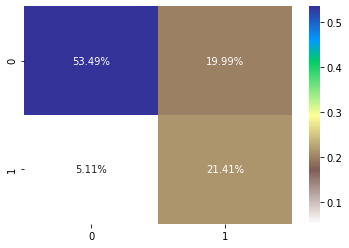

In [759]:
cat_model=cb.CatBoostClassifier(max_depth=4, n_estimators=500, scale_pos_weight=2.9, cat_features=['InternetService', 'Contract','SeniorCitizen', 'Partner', 'Dependents', 'tenure_cat', 'MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])
cat_model.fit(X_train,y_train, verbose=False)
ypred=cat_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
print(recall_score(y_test, ypred))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

In [738]:
from sklearn.utils.class_weight import compute_class_weight
class_weights2 = dict(zip(np.unique(y_train), compute_class_weight('balanced', np.unique(y_train), y_train))) 
class_weights2

c:\python36\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1], y=[0 1 0 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


{0: 0.6806701030927835, 1: 1.883737517831669}

0.33924769339957417
0.9572192513368984
0.26594417126200226


<AxesSubplot:>

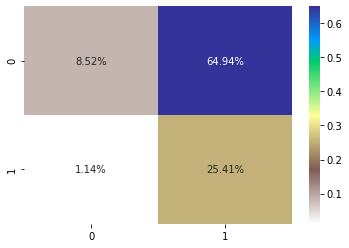

In [757]:
svm_model=svm.SVC(kernel="poly", class_weight=class_weights2, degree=5)
svm_model.fit(X_train,y_train)
ypred=svm_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
0.7529812606473595
0.7661039410211444


<AxesSubplot:>

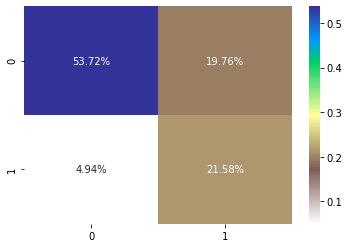

In [740]:
import lightgbm as lg
lgbm=lg.LGBMClassifier(max_depth=4, class_weight='balanced', num_leaves=5, min_data_in_leaf=300)
lgbm.fit(X_train,y_train)
ypred=lgbm.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

0.771152754116979
0.7781792596767602


<AxesSubplot:>

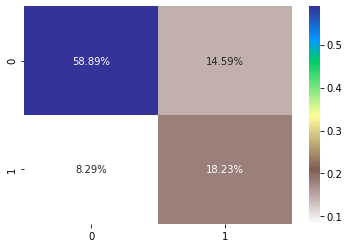

In [741]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
ypred=gb.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

0.7808063600227144
0.7559521454290735


<AxesSubplot:>

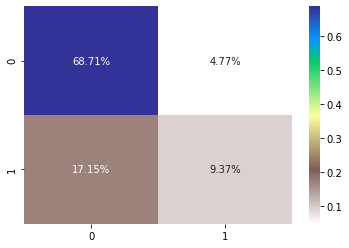

In [742]:
#clf1 = LogisticRegression(solver="newton-cg", class_weight='balanced')
clf2 = GaussianNB()
clf3 = svm.SVC(kernel='poly', class_weight="balanced", probability=True)
eclf = VotingClassifier(estimators=[('svc', clf3), ('gb', clf2)],voting='soft', weights=[9,4])

clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
eclf = eclf.fit(X_train,y_train)

ypred=eclf.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

Reduced False Positive - Not of much use

0.8001135718341851
0.7898087267411296
0.49464668094218417


<AxesSubplot:>

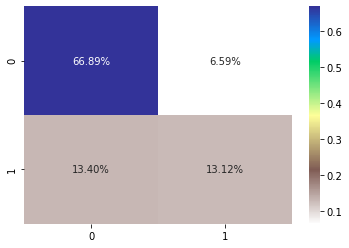

In [747]:
gbc_model=GradientBoostingClassifier(max_depth=4)
gbc_model.fit(X_train,y_train)
ypred=gbc_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
print(recall_score(y_test, ypred))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

0.7484383872799546
0.7615713742211312
0.7944325481798715


<AxesSubplot:>

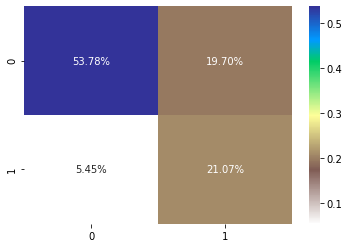

In [748]:
rt=RandomForestClassifier(max_depth=4, n_estimators=1900, class_weight="balanced")
rt.fit(X_train,y_train)
ypred=rt.predict(X_test)
print(accuracy_score(y_test, ypred))
print(f1_score(y_test, ypred, average="weighted"))
print(recall_score(y_test, ypred))
cf_matrix=confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='terrain_r',fmt='.2%', annot=True)

In [744]:
metric_names = ['f1', 'roc_auc', 'average_precision', 'accuracy', 'precision', 'recall']
scores_df = pd.DataFrame(index=metric_names, columns=['Random-CV', 'Stratified-CV']) # to store the scores
cv = KFold(n_splits=3) #RandomCV
scv = StratifiedKFold(n_splits=3)  #Stratified
clf = svm.SVC(kernel='poly', class_weight='balanced', probability=True)

for metric in metric_names:
    score1 = cross_val_score(clf, X, y, scoring=metric, cv=cv).mean()
    score2 = cross_val_score(clf, X, y, scoring=metric, cv=scv).mean()
    scores_df.loc[metric] = [score1, score2]

scores_df

,Random-CV,Stratified-CV
f1,0.441232,0.441256
roc_auc,0.689582,0.689461
average_precision,0.475244,0.475069
accuracy,0.380094,0.380094
precision,0.289987,0.289989
recall,0.922422,0.922418
